In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\USER\Downloads\hotel_revenue_historical_full.xlsx")

In [34]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           21996 non-null  object        
 1   is_canceled                     21996 non-null  int64         
 2   lead_time                       21996 non-null  int64         
 3   arrival_date_year               21996 non-null  int64         
 4   arrival_date_month              21996 non-null  object        
 5   arrival_date_week_number        21996 non-null  int64         
 6   arrival_date_day_of_month       21996 non-null  int64         
 7   stays_in_weekend_nights         21996 non-null  int64         
 8   stays_in_week_nights            21996 non-null  int64         
 9   adults                          21996 non-null  int64         
 10  children                        21992 non-null  float64       
 11  ba

In [6]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             133
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3099
company                           20691


In [7]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
df['arrival_date_year'].unique()

array([2018], dtype=int64)

In [11]:
# Total revenue generated from the hotels
total_revenue = (df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])).sum()
print('The Revenue Generated From The Hotels Is ',total_revenue)

The Revenue Generated From The Hotels Is  6818116.56


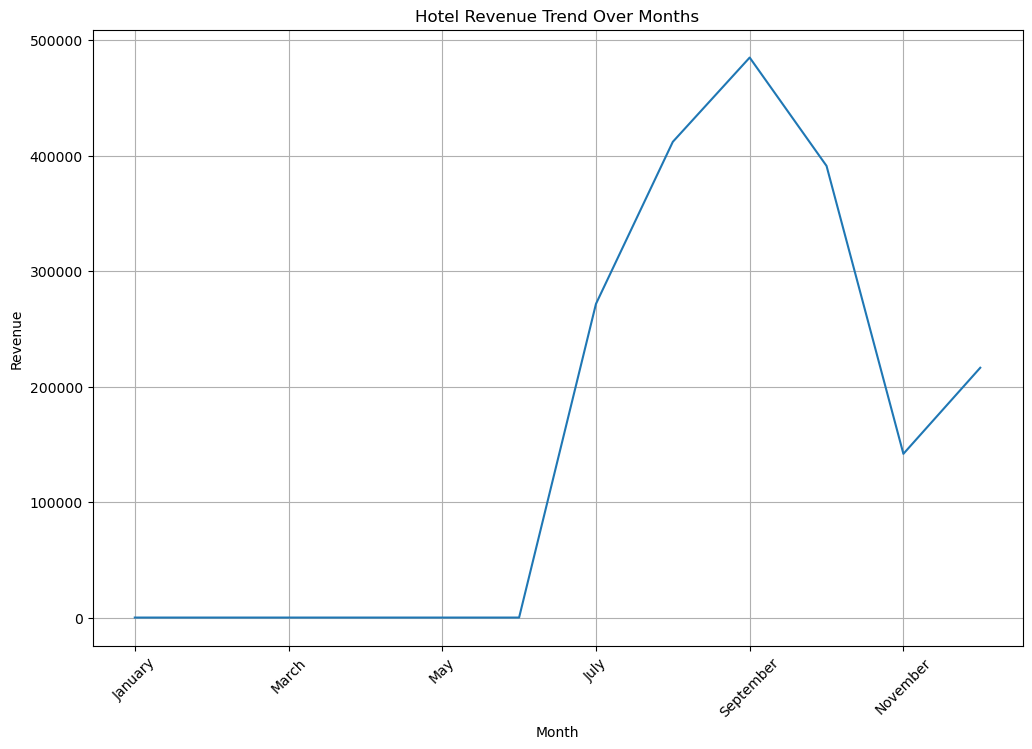

In [17]:
# Hotel revenue trend over months
# Ensure arrival_date_month is categorical and ordered
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Hotel revenue trend over months with grid
monthly_revenue = df.groupby('arrival_date_month')['adr'].sum()
monthly_revenue.plot(kind='line', figsize=(12, 8), grid=True)
plt.title('Hotel Revenue Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


### The line graph show us that the Hotel revenue trend is declining over the month


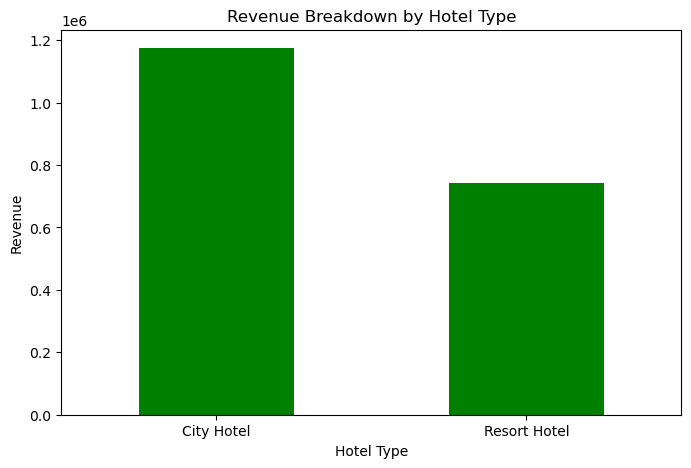

In [22]:
# Revenue breakdown by hotel type
revenue_by_hotel_type = df.groupby('hotel')['adr'].sum()
revenue_by_hotel_type.plot(kind='bar', figsize=(8, 5),color='green')
plt.title('Revenue Breakdown by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

In [23]:
# Average Daily Rate (ADR) by hotel type
adr_by_hotel_type = df.groupby('hotel')['adr'].mean().reset_index()
adr_by_hotel_type.rename(columns={'adr': 'average_daily_rate'}, inplace=True)
print("Average Daily Rate (ADR) by Hotel Type:")
print(adr_by_hotel_type)


Average Daily Rate (ADR) by Hotel Type:
          hotel  average_daily_rate
0    City Hotel           85.856915
1  Resort Hotel           89.353417


In [24]:
# Average discount from the hotel chain
average_discount = df['adr'].mean() - df['adr'].median()
print('The Average discount from the hotel chain will be ',average_discount)

The Average discount from the hotel chain will be  9.418515184579022


In [25]:
# Seasonal trends in hotel revenue
seasonal_revenue = df.groupby('arrival_date_month')['adr'].sum()
peak_seasons = seasonal_revenue.idxmax()
low_seasons = seasonal_revenue.idxmin()
print("Peak Season(s):", peak_seasons)
print("Low Season(s):", low_seasons)


Peak Season(s): September
Low Season(s): January


In [26]:
# Total number of nights stayed by guests
total_nights_stayed = (df['stays_in_weekend_nights'] + df['stays_in_week_nights']).sum()
print('The Total number of nights stayed by guests is calculated to be ',total_nights_stayed)

The Total number of nights stayed by guests is calculated to be  74588


In [28]:
# Market segment distribution revenue
segment_distribution_revenue = df.groupby('market_segment')['adr'].sum()
print('The total market segment distribution revenue is ',segment_distribution_revenue)

The total market segment distribution revenue is  market_segment
Complementary       425.33
Corporate         74946.09
Direct           249571.22
Groups           453622.61
Offline TA/TO    503305.98
Online TA        635677.39
Undefined            30.00
Name: adr, dtype: float64


In [30]:
# Revenue by customer type
revenue_by_customer_type = df.groupby('customer_type')['adr'].sum()
print('The total Revenue by customer type is ',revenue_by_customer_type)

The total Revenue by customer type is  customer_type
Contract            239724.68
Group                14698.56
Transient          1061906.69
Transient-Party     601248.69
Name: adr, dtype: float64


In [32]:
# Calculate the total parking spaces
total_parking_spaces = df['required_car_parking_spaces'].sum()

# Revenue, count of required car parking spaces, and parking percentage for each arrival year and hotel
revenue_car_parking = df.groupby(['arrival_date_year', 'hotel']).agg({'adr': 'sum', 'required_car_parking_spaces': 'sum'})
revenue_car_parking['parking_percentage'] = (revenue_car_parking['required_car_parking_spaces'] / total_parking_spaces) * 100

print("Revenue, Count of Required Car Parking Spaces, and Parking Percentage by Arrival Year and Hotel:")
print(revenue_car_parking)


Revenue, Count of Required Car Parking Spaces, and Parking Percentage by Arrival Year and Hotel:
                                       adr  required_car_parking_spaces  \
arrival_date_year hotel                                                   
2018              City Hotel    1174694.31                          203   
                  Resort Hotel   742884.31                         1149   

                                parking_percentage  
arrival_date_year hotel                             
2018              City Hotel             15.014793  
                  Resort Hotel           84.985207  
